In [1]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from package.plots import overplot
from package.helpers import test_physical_lens, test_physical_lens_2

plt.style.use(f'{repo_path}/package/mplstyle/science.mplstyle')

/data/bwedig/.conda/envs/pandeia/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [3]:
figure_dir = os.path.join(repo_path, 'figures')
array_dir = os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'pixel_density_test')

In [4]:
oversample_factor = 9

pandeia = np.load(os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'pixel_density_test', f'detector_{oversample_factor}.npy'))

lens = test_physical_lens.TestPhysicalLens()
num_pix = 45

model = lens.get_array(num_pix=num_pix)

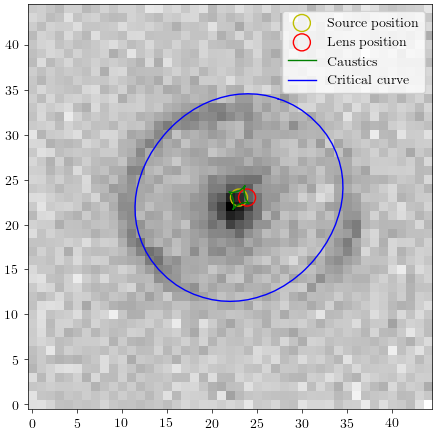

In [5]:
fig, ax = plt.subplots()

ax.imshow(np.log10(pandeia), cmap='binary')

overplot.source_position(ax, lens)
overplot.lens_position(ax, lens)
overplot.caustics(ax, lens)
overplot.critical_curves(ax, lens)

plt.legend()

plt.savefig(os.path.join(figure_dir, 'roman_image.png'))
plt.show()